In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [105]:
df = pd.read_csv('pump_leakage_1.csv')
df.head()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,FS1,FS2,EPS1,VS1,internal_pump_leakage
0,0,160.673492,109.466914,1.991475,0.0,9.842170,9.728098,35.621983,40.978767,38.471017,31.745250,6.709815,10.304592,2538.929167,0.576950,0.0
1,1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,36.676967,41.532767,38.978967,34.493867,6.715315,10.403098,2531.498900,0.565850,0.0
2,2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,37.880800,42.442450,39.631950,35.646150,6.718522,10.366250,2519.928000,0.576533,0.0
3,3,160.188088,109.064807,1.946576,0.0,9.438827,9.337430,38.879050,43.403983,40.403383,36.579467,6.720565,10.302678,2511.541633,0.569267,0.0
4,4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,39.803917,44.332750,41.310550,37.427900,6.690308,10.237750,2503.449500,0.577367,0.0


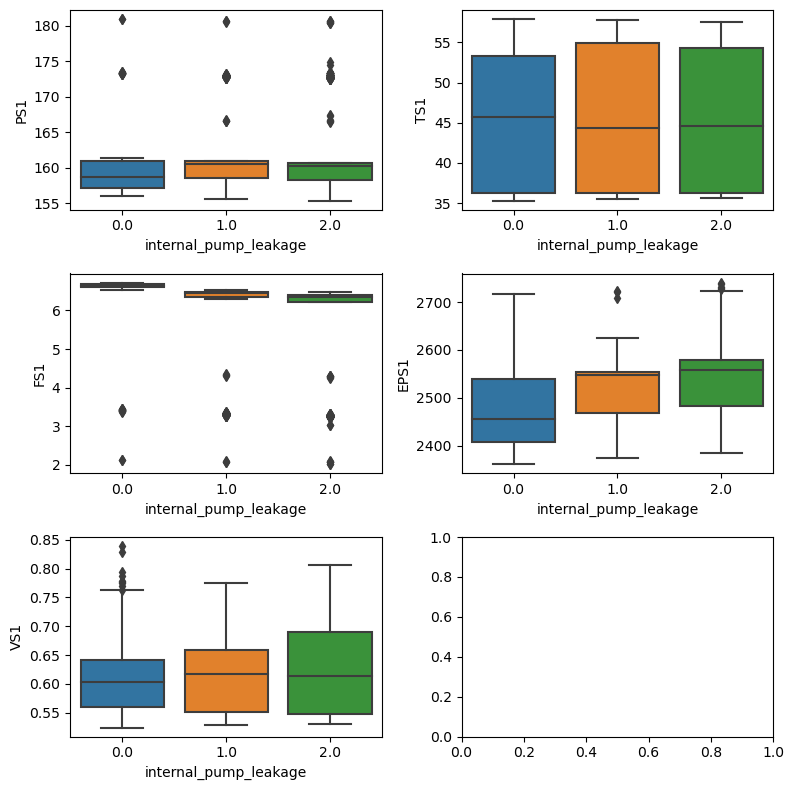

In [106]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

sns.boxplot(data=df, y="PS1",x="internal_pump_leakage",ax=axs[0, 0])
sns.boxplot(data=df, y="TS1",x="internal_pump_leakage",ax=axs[0, 1])
sns.boxplot(data=df, y="FS1",x="internal_pump_leakage",ax=axs[1, 0])
sns.boxplot(data=df, y="EPS1",x="internal_pump_leakage",ax=axs[1, 1])
sns.boxplot(data=df, y="VS1",x="internal_pump_leakage",ax=axs[2, 0])

fig.tight_layout()

# 1. Data Importing

In [107]:
def importData(filename):
    """
    Fungsi untuk import data & hapus duplikat
    :param filename: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sampel data
    """

    # read data
    df = pd.read_csv(filename)
    print("Data asli            : ", df.shape, "- (#observasi, #kolom)")

    # drop duplicates
    df = df.drop_duplicates()
    print("Data setelah di-drop : ", df.shape, "- (#observasi, #kolom)")

    return df

In [108]:
file_name = "pump_leakage_1.csv"

#calling importdata function
data = importData(filename = file_name)

Data asli            :  (2205, 16) - (#observasi, #kolom)
Data setelah di-drop :  (2205, 16) - (#observasi, #kolom)


In [109]:
data.head()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,FS1,FS2,EPS1,VS1,internal_pump_leakage
0,0,160.673492,109.466914,1.991475,0.0,9.842170,9.728098,35.621983,40.978767,38.471017,31.745250,6.709815,10.304592,2538.929167,0.576950,0.0
1,1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,36.676967,41.532767,38.978967,34.493867,6.715315,10.403098,2531.498900,0.565850,0.0
2,2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,37.880800,42.442450,39.631950,35.646150,6.718522,10.366250,2519.928000,0.576533,0.0
3,3,160.188088,109.064807,1.946576,0.0,9.438827,9.337430,38.879050,43.403983,40.403383,36.579467,6.720565,10.302678,2511.541633,0.569267,0.0
4,4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,39.803917,44.332750,41.310550,37.427900,6.690308,10.237750,2503.449500,0.577367,0.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2205 non-null   int64  
 1   PS1                    2205 non-null   float64
 2   PS2                    2205 non-null   float64
 3   PS3                    2205 non-null   float64
 4   PS4                    2205 non-null   float64
 5   PS5                    2205 non-null   float64
 6   PS6                    2205 non-null   float64
 7   TS1                    2205 non-null   float64
 8   TS2                    2205 non-null   float64
 9   TS3                    2205 non-null   float64
 10  TS4                    2205 non-null   float64
 11  FS1                    2205 non-null   float64
 12  FS2                    2205 non-null   float64
 13  EPS1                   2205 non-null   float64
 14  VS1                    2205 non-null   float64
 15  inte

In [111]:
data.internal_pump_leakage.value_counts()

0.0    1221
2.0     492
1.0     492
Name: internal_pump_leakage, dtype: int64

# 2. Data Preparation

**Extract input-output from data frame**

In [112]:
def extractInputOutput(data,
                       output_column_name,
                       column_to_drop):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    # drop data
    data = data.drop(columns = column_to_drop)
    X = data.drop(output_column_name,
                  axis = 1)
    y = data.loc[:,output_column_name].squeeze()

    
    return X, y

In [113]:
column_to_drop = ["Unnamed: 0"]
output_column_name = ["internal_pump_leakage"]

X, y = extractInputOutput(data = data,
                          output_column_name = output_column_name,
                          column_to_drop = column_to_drop)

In [114]:
#sanity check
X.head()

,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,FS1,FS2,EPS1,VS1
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728098,35.621983,40.978767,38.471017,31.745250,6.709815,10.304592,2538.929167,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,36.676967,41.532767,38.978967,34.493867,6.715315,10.403098,2531.498900,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,37.880800,42.442450,39.631950,35.646150,6.718522,10.366250,2519.928000,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337430,38.879050,43.403983,40.403383,36.579467,6.720565,10.302678,2511.541633,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,39.803917,44.332750,41.310550,37.427900,6.690308,10.237750,2503.449500,0.577367


In [115]:
type(y)

pandas.core.series.Series

**Split train and test data**

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 21)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1764, 14), (441, 14), (1764,), (441,))

In [117]:
y_train.value_counts(), y_test.value_counts()

(0.0    977
 1.0    394
 2.0    393
 Name: internal_pump_leakage, dtype: int64,
 0.0    244
 2.0     99
 1.0     98
 Name: internal_pump_leakage, dtype: int64)

**Baseline Model**

In [118]:
from sklearn.dummy import DummyClassifier
# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [119]:
y_pred_dummy = dummy_clf.predict(X_train)

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)

array([[977,   0,   0],
       [394,   0,   0],
       [393,   0,   0]])

In [121]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)

0.5538548752834467

**Scale Data**

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler

In [124]:
X_train_clean, scaler = standardizeData(data = X_train)
X_train_clean.head()

,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,FS1,FS2,EPS1,VS1
127,-0.734467,-0.607015,-0.026641,-0.605834,-1.000370,-1.003742,1.024887,1.060390,1.012135,1.016741,0.406391,-0.921940,-1.261710,0.796025
1588,0.105761,0.039269,0.983390,-0.028302,1.361143,1.361889,-1.250044,-1.253123,-1.245905,-1.264138,0.484218,1.172146,0.615297,-0.954257
949,-0.514306,-0.571835,-0.173114,-0.605834,-0.221074,-0.217753,0.065318,0.062368,0.065717,0.106953,0.128763,-0.031212,-0.297498,0.091245
238,-0.913426,-0.770763,-0.445401,-0.605834,-1.085804,-1.091379,1.097271,1.124771,1.072929,1.078012,0.086062,-0.983693,-1.082018,0.751821
257,-0.839397,-0.842801,-0.285234,-0.605834,-1.110078,-1.113129,1.117470,1.152624,1.102248,1.097355,0.123872,-1.019798,-1.209862,0.782846


**Transform Test Data**

In [125]:
def transformTestData(data, scaler):
    #Scale test data with train data scaler
    data_clean, _ = standardizeData(data = data,
                                    scaler = scaler)
    
    return data_clean

In [126]:
X_test_clean = transformTestData(data = X_test,
                                 scaler = scaler)

X_test_clean.head()

,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,FS1,FS2,EPS1,VS1
986,-0.455070,-0.530002,-0.064644,-0.605834,-0.209632,-0.207111,0.057477,0.050614,0.057627,0.086739,0.213084,-0.021978,-0.466381,0.201615
768,-0.540918,-0.470657,0.124711,-0.605834,-0.379102,-0.376689,0.268473,0.314750,0.280926,0.279726,0.422544,-0.186655,-0.747020,-0.062780
414,2.589282,2.686193,-2.366922,-0.578821,-1.277511,-1.272475,1.421580,1.380026,1.448585,1.419216,-2.712926,-1.532558,1.641559,1.621608
1121,-0.406473,-0.502371,0.006628,-0.605834,-0.077648,-0.081639,-0.085394,-0.089686,-0.095696,-0.047518,0.229737,0.088545,-0.398703,0.205459
181,-0.711771,-0.591185,-0.034426,-0.605834,-1.062725,-1.072536,1.078012,1.124717,1.064371,1.062591,0.393839,-1.010657,-1.361136,0.861368


# 3. Data Modeling

In [127]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## a. Logistic Regression

In [128]:
# Weight Class
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

0.0    0.601842
1.0    1.492386
2.0    1.496183
Name: internal_pump_leakage, dtype: float64

In [129]:
# Create object
logreg = LogisticRegression(class_weight = dict(class_weight),
                            random_state = 21,
                            solver='liblinear', 
                            max_iter=5000)

**Quick Check**

In [130]:
# Quick check
logreg.fit(X = X_train_clean,
              y = y_train)
logreg.fit(X = X_test_clean,
              y = y_test)

y_pred_train_1 = logreg.predict(X_train_clean)
y_pred_test_1 = logreg.predict(X_test_clean)


print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_1,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_1,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       0.96      0.99      0.97       977
  weak leakage       0.90      0.65      0.75       394
severe leakage       0.80      0.96      0.87       393

      accuracy                           0.91      1764
     macro avg       0.89      0.87      0.87      1764
  weighted avg       0.91      0.91      0.90      1764

                precision    recall  f1-score   support

    no leakage       0.95      0.98      0.97       244
  weak leakage       0.93      0.68      0.79        98
severe leakage       0.84      0.99      0.91        99

      accuracy                           0.92       441
     macro avg       0.91      0.89      0.89       441
  weighted avg       0.92      0.92      0.91       441



In [131]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_1)

array([[240,   4,   0],
       [ 12,  67,  19],
       [  0,   1,  98]])

In [132]:
# Lakukan eksperimentasi
search_params = {"solver" : ["lbfgs", "saga", "newton-cg"],
                 "penalty": ["l1", "l2"],
                 "C": np.logspace(-5,5,20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5, 
                         scoring='f1_weighted')

In [133]:
logreg_cv.fit(X = X_train_clean,
              y = y_train)

/Users/bagusemeraldo/miniforge3/envs/Project-Predictive Maintenance Pump/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bagusemeraldo/miniforge3/envs/Project-Predictive Maintenance Pump/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bagusemeraldo/miniforge3/envs/Project-Predictive Maintenance Pump/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(s

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0.0: 0.601842374616172,
                                                        1.0: 1.4923857868020305,
                                                        2.0: 1.4961832061068703},
                                          max_iter=5000, random_state=21,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']},
             scoring='f1_weighted')

In [134]:
logreg_cv.best_params_

{'C': 784.7599703514607, 'penalty': 'l2', 'solver': 'lbfgs'}

In [135]:
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            class_weight = dict(class_weight),
                            solver = logreg_cv.best_params_["solver"], 
                            max_iter = 5000,                            
                            random_state = 21)

# Fit model
logreg.fit(X_train_clean, y_train)

LogisticRegression(C=784.7599703514607,
                   class_weight={0.0: 0.601842374616172,
                                 1.0: 1.4923857868020305,
                                 2.0: 1.4961832061068703},
                   max_iter=5000, random_state=21)

**Prediction on data train**

In [136]:
# Buat prediksi probability
y_pred_train_proba_logreg = logreg.predict_proba(X_train_clean)
y_pred_train_proba_logreg

# [1 - P(y = 1), P(y = 1)]

array([[9.99996889e-01, 3.11092354e-06, 1.87941218e-20],
       [9.99989674e-01, 1.03259922e-05, 6.44679926e-25],
       [1.73641518e-14, 1.01765761e-04, 9.99898234e-01],
       ...,
       [9.99988634e-01, 1.13663408e-05, 7.81335086e-25],
       [9.99713859e-01, 2.86140808e-04, 5.40345902e-17],
       [9.99940274e-01, 5.97257572e-05, 2.18388547e-17]])

In [137]:
y_pred_train_logreg = logreg.predict(X_train_clean)
y_pred_train_logreg

array([0., 0., 2., ..., 0., 0., 0.])

In [138]:
# Classification report
print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_logreg,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       1.00      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764



In [139]:
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train_logreg)

array([[977,   0,   0],
       [  0, 394,   0],
       [  0,   0, 393]])

**Prediction on data test**

In [140]:
y_pred_test_proba_logreg = logreg.predict_proba(X_test_clean)
y_pred_test_proba_logreg

array([[1.11877864e-05, 9.99121927e-01, 8.66885546e-04],
       [9.98330550e-01, 1.66944974e-03, 6.96415141e-15],
       [1.11995827e-03, 9.97922283e-01, 9.57758572e-04],
       ...,
       [9.99987950e-01, 1.20501144e-05, 1.96233933e-18],
       [9.61527205e-01, 3.84727950e-02, 2.95083081e-11],
       [5.85712352e-06, 9.99688194e-01, 3.05949180e-04]])

In [141]:
y_pred_test_logreg = logreg.predict(X_test_clean)
y_pred_test_logreg

array([1., 0., 1., 1., 0., 2., 2., 0., 2., 0., 0., 0., 0., 1., 0., 0., 1.,
       2., 2., 0., 0., 0., 1., 0., 0., 1., 2., 0., 1., 2., 0., 0., 0., 2.,
       0., 1., 0., 2., 0., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 2., 0., 1., 1., 0., 0., 2., 1., 2., 1., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 2., 0., 2., 1., 0., 1., 0., 2., 0., 2., 0., 0., 2.,
       0., 2., 0., 0., 0., 1., 2., 1., 2., 0., 2., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 0., 2., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0.,
       2., 1., 0., 1., 2., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 2., 2., 2., 1., 2., 1., 2.,
       0., 2., 1., 1., 0., 1., 2., 0., 1., 0., 1., 2., 0., 0., 0., 2., 2.,
       1., 1., 0., 0., 0.

In [142]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_logreg)

array([[244,   0,   0],
       [  0,  98,   0],
       [  0,   0,  99]])

In [143]:
# Classification report
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_logreg,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       244
  weak leakage       1.00      1.00      1.00        98
severe leakage       1.00      1.00      1.00        99

      accuracy                           1.00       441
     macro avg       1.00      1.00      1.00       441
  weighted avg       1.00      1.00      1.00       441



## b. SVC

In [144]:
svc = SVC(class_weight = dict(class_weight),
          random_state = 21)

In [145]:
svc.fit(X = X_train_clean,
              y = y_train)
svc.fit(X = X_test_clean,
              y = y_test)

y_pred_train_2 = svc.predict(X_train_clean)
y_pred_test_2 = svc.predict(X_test_clean)

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_2,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_2,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       0.93      0.80      0.86       977
  weak leakage       0.34      0.54      0.42       394
severe leakage       0.56      0.43      0.49       393

      accuracy                           0.66      1764
     macro avg       0.61      0.59      0.59      1764
  weighted avg       0.71      0.66      0.68      1764

                precision    recall  f1-score   support

    no leakage       0.93      0.82      0.87       244
  weak leakage       0.38      0.56      0.46        98
severe leakage       0.63      0.53      0.57        99

      accuracy                           0.70       441
     macro avg       0.65      0.64      0.63       441
  weighted avg       0.74      0.70      0.71       441



In [146]:
# Lakukan eksperimentasi
search_params = {"kernel": ["linear","poly", "rbf", "sigmoid"],
                 "C": np.logspace(2, 3, 20)}

svc_cv = GridSearchCV(estimator = svc,
                      param_grid = search_params,
                      cv = 5,
                      scoring='f1_weighted')

In [147]:
# Lakukan Fitting Data
svc_cv.fit(X = X_train_clean,
           y = y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0.0: 0.601842374616172,
                                         1.0: 1.4923857868020305,
                                         2.0: 1.4961832061068703},
                           random_state=21),
             param_grid={'C': array([ 100.        ,  112.88378917,  127.42749857,  143.84498883,
        162.37767392,  183.29807108,  206.91380811,  233.57214691,
        263.66508987,  297.63514416,  335.98182863,  379.26901907,
        428.13323987,  483.29302386,  545.55947812,  615.84821107,
        695.19279618,  784.75997035,  885.86679041, 1000.        ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_weighted')

In [148]:
# Best params
svc_cv.best_params_

{'C': 127.42749857031335, 'kernel': 'rbf'}

In [149]:
# Buat best model
svc = SVC(kernel = svc_cv.best_params_["kernel"],
          C = svc_cv.best_params_["C"],
          probability = True,
          class_weight = dict(class_weight),
          random_state = 21)

# Fit model
svc.fit(X_train_clean, y_train)

SVC(C=127.42749857031335,
    class_weight={0.0: 0.601842374616172, 1.0: 1.4923857868020305,
                  2.0: 1.4961832061068703},
    probability=True, random_state=21)

**Predict and evaluate**

**Prediction on data train**

In [150]:
# Buat prediksi probability
y_pred_train_proba_svc = svc.predict_proba(X_train_clean)
y_pred_train_proba_svc

# [1 - P(y = 1), P(y = 1)]

array([[9.99116762e-01, 5.12203221e-04, 3.71034675e-04],
       [9.99866419e-01, 1.07963094e-04, 2.56181469e-05],
       [1.38037381e-06, 1.65619378e-06, 9.99996963e-01],
       ...,
       [9.99808531e-01, 1.64776389e-04, 2.66922366e-05],
       [9.96371769e-01, 2.89415998e-03, 7.34070795e-04],
       [9.98264943e-01, 8.71300741e-04, 8.63756389e-04]])

In [151]:
y_pred_train_svc = svc.predict(X_train_clean)
y_pred_train_svc

array([0., 0., 2., ..., 0., 0., 0.])

In [152]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train_svc)

array([[977,   0,   0],
       [  0, 394,   0],
       [  0,   0, 393]])

In [153]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_svc,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       1.00      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764



**Prediction on data test**

In [154]:
# Buat prediksi probability
y_pred_test_proba_svc = svc.predict_proba(X_test_clean)
y_pred_test_proba_svc

# [1 - P(y = 1), P(y = 1)]

array([[6.90559410e-07, 9.99210556e-01, 7.88753665e-04],
       [9.97608659e-01, 1.99397802e-03, 3.97363358e-04],
       [1.85955870e-07, 9.99837453e-01, 1.62361098e-04],
       ...,
       [9.99340479e-01, 5.46380969e-04, 1.13140064e-04],
       [5.45810679e-02, 9.39522363e-01, 5.89656953e-03],
       [3.61705950e-06, 9.98109123e-01, 1.88726043e-03]])

In [155]:
y_pred_test_svc = svc.predict(X_test_clean)
y_pred_test_svc

array([1., 0., 1., 1., 0., 2., 2., 0., 2., 0., 0., 0., 0., 1., 0., 0., 1.,
       2., 2., 0., 0., 0., 1., 0., 0., 1., 2., 0., 1., 2., 0., 0., 0., 2.,
       0., 1., 0., 2., 0., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 2., 0., 1., 1., 0., 0., 2., 1., 2., 1., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 2., 0., 2., 1., 0., 1., 0., 2., 0., 2., 0., 0., 2.,
       0., 2., 0., 0., 0., 1., 2., 1., 2., 0., 2., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 0., 2., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0.,
       2., 1., 0., 1., 2., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 2., 2., 2., 1., 2., 1., 2.,
       0., 2., 1., 1., 0., 1., 2., 0., 1., 0., 1., 2., 0., 0., 0., 2., 2.,
       1., 1., 0., 0., 0.

In [156]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_svc)

# [[tp, fp]]
# [[fn, tn]]

array([[242,   2,   0],
       [  0,  98,   0],
       [  0,   0,  99]])

In [157]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_svc,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      0.99      1.00       244
  weak leakage       0.98      1.00      0.99        98
severe leakage       1.00      1.00      1.00        99

      accuracy                           1.00       441
     macro avg       0.99      1.00      1.00       441
  weighted avg       1.00      1.00      1.00       441



## c. Random Forest

In [158]:
rf = RandomForestClassifier(max_features = "sqrt",
                            random_state = 21,
                            class_weight=dict(class_weight))
rf.fit(X_train_clean, y_train)

RandomForestClassifier(class_weight={0.0: 0.601842374616172,
                                     1.0: 1.4923857868020305,
                                     2.0: 1.4961832061068703},
                       random_state=21)

In [159]:
y_pred_train_3 = rf.predict(X_train_clean)
y_pred_test_3 = rf.predict(X_test_clean)

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_3,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_3,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       1.00      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764

                precision    recall  f1-score   support

    no leakage       1.00      0.99      0.99       244
  weak leakage       1.00      1.00      1.00        98
severe leakage       0.97      1.00      0.99        99

      accuracy                           0.99       441
     macro avg       0.99      1.00      0.99       441
  weighted avg       0.99      0.99      0.99       441



In [161]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_3)

array([[241,   0,   3],
       [  0,  98,   0],
       [  0,   0,  99]])

In [162]:
# Lakukan eksperimentasi
# B = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# search_params = {"n_estimators": B,
#                  "max_features": ["sqrt", "log2"]}

search_params = {'bootstrap': [True, False],
                 'max_depth': [5, 10, 15, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'min_samples_leaf': [2, 5, 10],
                 'min_samples_split': [2, 4, 6],
                 'n_estimators': [21, 23, 25, 27, 29, 31]}

rf_cv = GridSearchCV(estimator = rf,
                     param_grid = search_params,
                     cv = 5,
                     error_score='raise',
                     scoring='f1_weighted')

In [163]:
rf_cv.fit(X_train_clean,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight={0.0: 0.601842374616172,
                                                            1.0: 1.4923857868020305,
                                                            2.0: 1.4961832061068703},
                                              random_state=21),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [21, 23, 25, 27, 29, 31]},
             scoring='f1_weighted')

In [164]:
# Best params
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 29}

In [165]:
# Buat best model
rf = RandomForestClassifier(max_depth = rf_cv.best_params_["max_depth"],
                            max_features = 'sqrt',
                            min_samples_leaf = rf_cv.best_params_["min_samples_leaf"],
                            min_samples_split = rf_cv.best_params_["min_samples_split"], 
                            n_estimators = rf_cv.best_params_["n_estimators"],
                            random_state = 21, class_weight=dict(class_weight))

# Fit model
rf.fit(X_train_clean, y_train)

RandomForestClassifier(class_weight={0.0: 0.601842374616172,
                                     1.0: 1.4923857868020305,
                                     2.0: 1.4961832061068703},
                       max_depth=10, min_samples_leaf=2, n_estimators=29,
                       random_state=21)

In [166]:
y_pred_train_rf = rf.predict(X_train_clean)
y_pred_train_rf

array([0., 0., 2., ..., 0., 0., 0.])

In [167]:
# Classification report
print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_rf,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       0.99      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764



In [168]:
y_pred_test_rf = rf.predict(X_test_clean)
y_pred_test_rf

array([1., 0., 1., 1., 0., 2., 2., 0., 2., 0., 0., 0., 0., 1., 0., 0., 1.,
       2., 2., 0., 0., 0., 1., 0., 0., 1., 2., 0., 1., 2., 0., 0., 0., 2.,
       0., 1., 0., 2., 0., 1., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 2., 0., 1., 1., 0., 0., 2., 1., 2., 1., 2., 0., 0., 0., 2.,
       0., 0., 0., 0., 2., 0., 2., 1., 0., 1., 0., 2., 0., 2., 0., 0., 2.,
       0., 2., 0., 0., 0., 1., 2., 1., 2., 0., 2., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 0., 2., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0.,
       2., 1., 0., 1., 2., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 2., 2., 2., 1., 2., 1., 2.,
       0., 2., 1., 1., 0., 1., 2., 0., 1., 0., 1., 2., 0., 0., 0., 2., 2.,
       1., 1., 0., 0., 0.

In [169]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_rf)
# [[tp, fp]]
# [[fn, tn]]

array([[241,   1,   2],
       [  0,  98,   0],
       [  0,   0,  99]])

In [170]:
# Classification report
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_rf,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      0.99      0.99       244
  weak leakage       0.99      1.00      0.99        98
severe leakage       0.98      1.00      0.99        99

      accuracy                           0.99       441
     macro avg       0.99      1.00      0.99       441
  weighted avg       0.99      0.99      0.99       441



## d. XGBoost

In [171]:
from xgboost import XGBClassifier

In [172]:
# Define the XGBoost classifier
xgb_model = XGBClassifier(objective="multi:softmax")
xgb_model.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [173]:
y_pred_train_4 = xgb_model.predict(X_train_clean)
y_pred_test_4 = xgb_model.predict(X_test_clean)

In [174]:
print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_4,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_4,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       1.00      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764

                precision    recall  f1-score   support

    no leakage       1.00      0.99      1.00       244
  weak leakage       0.98      1.00      0.99        98
severe leakage       1.00      1.00      1.00        99

      accuracy                           1.00       441
     macro avg       0.99      1.00      1.00       441
  weighted avg       1.00      1.00      1.00       441



In [175]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_4)

array([[242,   2,   0],
       [  0,  98,   0],
       [  0,   0,  99]])

In [176]:
# Set the hyperparameters to tune
parameters = {'max_depth': [6, 7, 8],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [40, 50, 60],
              'subsample': [0.5, 0.6, 0.7],
              'colsample_bytree': [0.3, 0.4, 0.5], 
              }
xgb_cv = GridSearchCV(xgb_model, 
                      parameters, 
                      cv=5, 
                      verbose=2, 
                      scoring='f1_weighted')
xgb_cv.fit(X_train_clean, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree

[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=60, subsampl

[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=50,

[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=60,

[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=6, n_estimators=50, subsampl

[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=40, subsampl

[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=6, n_estimators=60,

[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=40, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=50,

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=60, subsampl

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=50, subsampl

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=40,

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=50, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=60,

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'learning_rate': [0.1, 0.01], 'max_depth': [6, 7, 8],
                         'n_estimators': [40, 50, 60],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='f1_weighted', verbose=2)

In [177]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.6}

In [184]:
xgb = XGBClassifier(colsample_bytree = xgb_cv.best_params_["colsample_bytree"],
                    learning_rate = xgb_cv.best_params_["learning_rate"],
                    max_depth = xgb_cv.best_params_["max_depth"],
                    subsample = xgb_cv.best_params_["subsample"], 
                    n_estimators = xgb_cv.best_params_["n_estimators"],                    
                    random_state = 21,
                    objective="multi:softmax")

# Fit model
xgb.fit(X_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [185]:
y_pred_train_xgb = xgb_model.predict(X_train_clean)
y_pred_test_xgb = xgb_model.predict(X_test_clean)

In [186]:
print(classification_report(y_true = y_train,
                            y_pred = y_pred_train_xgb,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_xgb,
                            target_names = ["no leakage", "weak leakage", "severe leakage"]))

                precision    recall  f1-score   support

    no leakage       1.00      1.00      1.00       977
  weak leakage       1.00      1.00      1.00       394
severe leakage       1.00      1.00      1.00       393

      accuracy                           1.00      1764
     macro avg       1.00      1.00      1.00      1764
  weighted avg       1.00      1.00      1.00      1764

                precision    recall  f1-score   support

    no leakage       1.00      0.99      1.00       244
  weak leakage       0.98      1.00      0.99        98
severe leakage       1.00      1.00      1.00        99

      accuracy                           1.00       441
     macro avg       0.99      1.00      1.00       441
  weighted avg       1.00      1.00      1.00       441



In [187]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_xgb)

array([[242,   2,   0],
       [  0,  98,   0],
       [  0,   0,  99]])

# 4. Performance Comparison

In [188]:
import time
models = [
    ('Logistic Regression', logreg),
    ('SVM', svc),
    ('Random Forest', rf),
    ('XGB', xgb)
]
time_cost = []
# Loop through each model and measure its training and evaluation time
for name, model in models:
    start_time = time.time()
    model.fit(X_train_clean, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    start_time = time.time()
    model.predict(X_test_clean)
    end_time = time.time()
    evaluation_time = end_time - start_time
    time_cost.append(evaluation_time)
    print(f'{name}: Training Time = {training_time:.5f} seconds, Evaluation Time = {evaluation_time:.5f} seconds')


Logistic Regression: Training Time = 0.15087 seconds, Evaluation Time = 0.00055 seconds
SVM: Training Time = 0.06156 seconds, Evaluation Time = 0.00230 seconds
Random Forest: Training Time = 0.04401 seconds, Evaluation Time = 0.00171 seconds
XGB: Training Time = 0.32933 seconds, Evaluation Time = 0.00200 seconds


In [189]:
from sklearn.metrics import f1_score

models_f1 = [logreg, svc, rf, xgb]

# Create a list to store the f1-scores of each model
f1_scores = []

# Loop through each model and calculate its f1-score
for model in models_f1:
    # Train the model on the training set
    model.fit(X_train_clean, y_train)
    
    # Use the model to make predictions on the testing set
    y_pred = model.predict(X_test_clean)
    
    # Calculate the f1-score of the model
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append the f1-score to the list
    f1_scores.append(f1)

# Create a DataFrame to store the f1-scores of each model
performance_df = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGB'],
                   'F1-score': f1_scores, 
                   'Computing Time Cost(s)': time_cost})

# Display the DataFrame
print(performance_df)


                 Model  F1-score  Computing Time Cost(s)
0  Logistic Regression  1.000000                0.000553
1                  SVM  0.995261                0.002301
2        Random Forest  0.992913                0.001712
3                  XGB  0.989579                0.002001


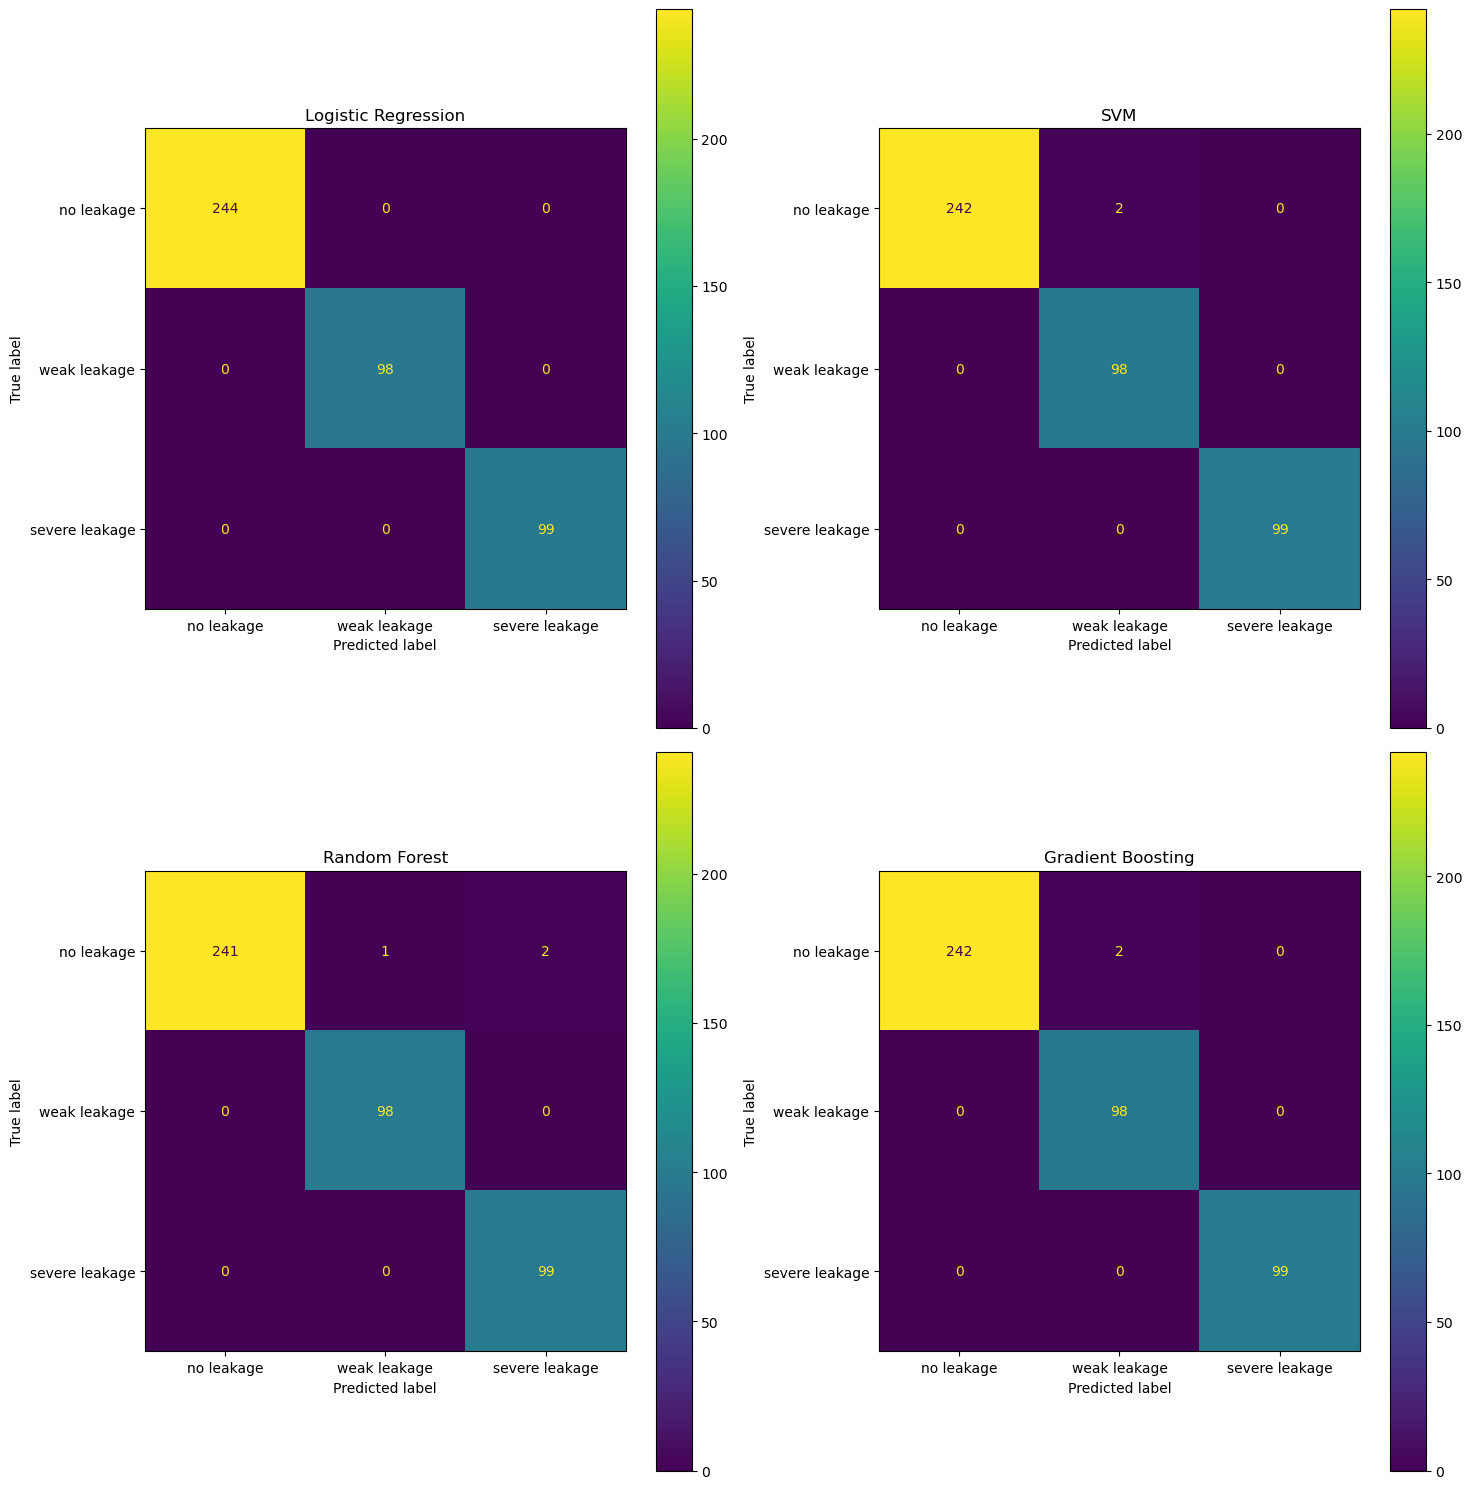

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay

# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Logistic Regression')
ax2.title.set_text('SVM')
ax3.title.set_text('Random Forest')
ax4.title.set_text('Gradient Boosting')

cm_logreg = confusion_matrix(y_test, y_pred_test_logreg, labels=logreg.classes_)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,
                              display_labels=["no leakage", "weak leakage", "severe leakage"])
disp_logreg.plot(ax=ax1)


cm_svc = confusion_matrix(y_test, y_pred_test_svc, labels=svc.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc,
                              display_labels=["no leakage", "weak leakage", "severe leakage"])
disp_svc.plot(ax=ax2)


cm_rf = confusion_matrix(y_test, y_pred_test_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=["no leakage", "weak leakage", "severe leakage"])
disp_rf.plot(ax=ax3)


cm_xgb = confusion_matrix(y_test, y_pred_test_xgb, labels=xgb.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                              display_labels=["no leakage", "weak leakage", "severe leakage"])
disp_xgb.plot(ax=ax4)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.tight_layout()
plt.show()